# Avance II
Equipo: 6 Grupo: 02 , viernes 15 a 18 hrs

Integrantes:
* 1837533 Castillo Cabello Carolina
* 1686204 Muñiz Salazar Rogelio

## Dataset de Gastos Médicos Personales
Esta base de datos describe los costos de un seguro de Gastos Médicos en Estados Unidos, proporcionando la información de 1338 individuos como su sexo, edad, índice de masa corporal, número de hijos, si son fumadores y los costos de un seguro de gastos médicos. 

Los datos tienen el siguiente formato:
* Edad del asegurado: Entero
* Género: Objeto
* Índice de masa corporal: Flotante
* Número de hijos: Objeto
* Indicador si fuma: Objeto
* Región donde vive el asegurado: Objeto
* Prima del seguro: Flotante

Decidimos utilizar esta base de datos, ya que nos parecía interesante poder descubrir la influencia monetaria que tenían cada una de las variables con el costo de una prima de seguros de gastos médicos, así como el intentar predecir el coste de una prima según las variables indicadas.

##### Preguntas de interés:
* ¿Qué variables afectan más a la prima de Gastos Médicos?
* ¿Se puede predecir el coste de una prima de Gastos Médicos en base a las variables?*

In [38]:
import matplotlib as plt
%matplotlib inline

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv("insurance.csv",encoding='utf8')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


###### Desarrollo de las herramienas
A continuación se muestran los datos sin manipulación.

In [2]:
df.dtypes #tipo de dato

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Se verifica que no haya ningún dato vacío en la base.

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
imc         0
dtype: int64

A la base de batos original no se le va a retirar ninguna columna. Se le modificará la columna de fumador, como una variable indicadora con 1 si es fumador y 0 si no es fumador, con motivo de que sea más fácil contabilizar y ver su densidad en distintos ejercicios. Así como también se va a agregar una nueva columna en la cual se va a dividir por clases el índice de masa corporal (bmi) como Bajo (menor a 28 kg/m^2) Medio (entre 28kg/m^2 y 41kg/m^2) y alto (superior a 54kg/m^2).

In [11]:
y=[]
z=[]
datos_x = df["smoker"]
for i in datos_x:
    if (i=="yes"):
        i=1
    else:
        i=0
    y.append(i)    
df["smoker"]=y

datos_y=df["bmi"]
for j in datos_y:
    if (j<28):
        j="Bajo"
    elif(j>28 and j<41):
        j="Medio"
    else:
        j="Alto"        
    z.append(j)

imc=pd.DataFrame(z)    
df['imc'] = imc #agregar

data=df
data.head(15)

,age,sex,bmi,children,smoker,region,charges,imc
0,19,female,27.900,0,1,southwest,16884.92400,Bajo
1,18,male,33.770,1,0,southeast,1725.55230,Medio
2,28,male,33.000,3,0,southeast,4449.46200,Medio
3,33,male,22.705,0,0,northwest,21984.47061,Bajo
4,32,male,28.880,0,0,northwest,3866.85520,Medio
5,31,female,25.740,0,0,southeast,3756.62160,Bajo
6,46,female,33.440,1,0,southeast,8240.58960,Medio
7,37,female,27.740,3,0,northwest,7281.50560,Bajo
8,37,male,29.830,2,0,northeast,6406.41070,Medio
9,60,female,25.840,0,0,northwest,28923.13692,Bajo


Creamos la nueva Base modificada

In [12]:
data.to_csv('clean_insurance.csv', index=False)
data.head()

,age,sex,bmi,children,smoker,region,charges,imc
0,19,female,27.900,0,1,southwest,16884.92400,Bajo
1,18,male,33.770,1,0,southeast,1725.55230,Medio
2,28,male,33.000,3,0,southeast,4449.46200,Medio
3,33,male,22.705,0,0,northwest,21984.47061,Bajo
4,32,male,28.880,0,0,northwest,3866.85520,Medio


Se obtiene un resumen de los datos para tener una mejor idea de cómo se distribuyen, así como para conocer elementos básicos de la misma.  
  
Se puede observar que el número de personas en esta base es de 1338, el rango de edades entre las que se encuentran es de 18 a 64 años, en promedio del índice de masa corporal es Medio (30.66), el 75% de los individuos tiene 2 hijos o menos, el 20% de los individuos es fumador. Así como también se puede observar el promedio de la prima cobrada por una compañía aseguradora es de: 13,270.422, lo que es mucho menor que el máximo de lo que se cobra que es: 63,770.42.¿Por qué se da este incremento tan grande?

In [10]:
data.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


Se puede observar que la cantidad de hombres y mujeres elegidos para este estudio es balanceada. También que la mayoría tiene un índice de masa corporal medio (ni con sobrepeso, ni bajos de peso), seguidos por los que tienen un IMC bajo y por último los que tienen un IMC alto.

In [20]:
data.groupby(['sex'])[['sex']].size()

sex
female    662
male      676
dtype: int64

In [21]:
data.groupby(['imc'])[['imc']].size()

imc
Alto      71
Bajo     466
Medio    801
dtype: int64

Se puede observar que hay mas individuos menores de 20 años que del resto de la pobalción.

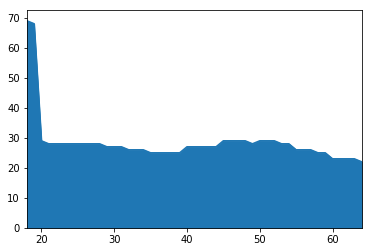

In [47]:
data['age'].value_counts().sort_index().plot.area()

Se peuden observar 3 grupos con diferentes costos de primas en una misma edad. ¿Qué otra variable influye en esto?

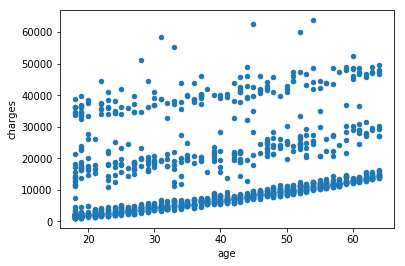

In [60]:
data.plot.scatter(x='age', y='charges')

Se puede observar un grupo de personas que se les va cobrando más a medida que su IMC aumenta.

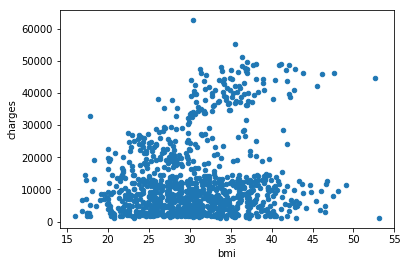

In [58]:
data.sample(1000).plot.scatter(x='bmi', y='charges')

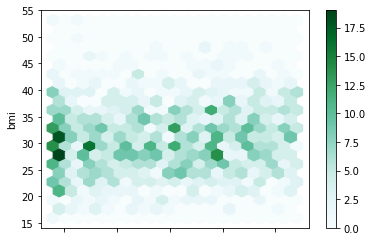

In [46]:
data.plot.hexbin(x='age', y='bmi', gridsize=20)